In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import os
import numpy as np

Reading and preparing input file (csv format)

In [2]:
csv_file = "/Users/tatiana/Downloads/PCA_features.csv"

In [3]:
df = pd.read_csv(csv_file)
df_redused = df.drop([9, 10, 14, 40], axis=0)  # remove samples C10, C11, L3 and L29
df_redused.head(15)

,Mice,Set,Genotype,PR_early,PtR_early,Comp_early,Imp_early,Apetitive_early,Aversive_early,Cognitive_flex_act_early,Cognitive_flex_inact_early,PR_late,PtR_late,Comp_late,Imp_late,Apetitive_late,Aversive_late,Cognitive_flex_act_late,Cognitive_flex_inact_late
0,1C,S,ADD,225.0,15.00,26.0,44.330000,61.0,116.0,18.0,164.0,300,12.67,4.0,61.67,160.0,143,110,420
1,2C,S,ADD,120.0,18.33,14.0,41.670000,22.0,143.0,18.0,102.0,180,19.00,4.0,78.67,14.0,182,45,302
2,7C,S,ADD,155.0,37.00,17.0,164.000000,61.0,117.0,0.0,146.0,155,24.67,6.0,84.00,61.0,142,18,162
3,4C,S,ADD,300.0,25.00,18.0,39.000000,56.0,259.0,29.0,223.0,300,39.33,2.0,124.33,35.0,179,19,183
4,5C,S,NADD,90.0,3.67,17.0,1.000000,164.0,166.0,27.0,343.0,120,11.33,2.0,52.33,18.0,167,56,183
5,6C,S,NADD,90.0,1.33,9.0,1.000000,55.0,88.0,5.0,115.0,155,0.00,1.0,66.00,9.0,169,71,47
6,8C,S,NADD,260.0,20.67,14.0,58.330000,254.0,182.0,0.0,153.0,155,4.67,3.0,23.00,4.0,177,19,118
7,3C,S,NADD,90.0,5.67,6.0,56.000000,33.0,138.0,82.0,79.0,180,8.33,3.0,24.33,63.0,137,28,170
8,9C,S,NADD,155.0,25.33,39.0,73.330000,67.0,63.0,5.0,227.0,225,1.67,1.0,54.67,95.0,83,1,191
11,12C,S,ADD,33.0,0.00,0.0,0.000000,2.0,2.0,0.0,0.0,350,10.00,10.0,214.00,22.0,188,9,282


Set features for PCA and correlation matrix

In [4]:
features = ['PR_late', 'PtR_late', 
            'Comp_late', 'Imp_late',
            'Apetitive_late', 'Aversive_late',
            'Cognitive_flex_act_late',
            'Cognitive_flex_inact_late']

In [5]:
# separating out the features
x = df_redused.loc[:, features].values

# separating out the target
y = df_redused.loc[:, ['Genotype']].values

# separating out the target (by sets)
set = df_redused.loc[:, ['Set']].values

In [6]:
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principal_component = pca.fit_transform(x)
pca_df = pd.DataFrame(data=principal_component, columns=['PCA 1', 'PCA 2'])
finalDF = pd.concat([pca_df, df_redused[['Genotype', 'Set']]], axis=1)

In [78]:
finalDF.head(3)

,PCA 1,PCA 2,Genotype,Set
0,2.826373,-0.057183,ADD,S
1,1.022863,-0.569879,ADD,S
2,0.778284,-1.726839,ADD,S


PCA by Addiction type

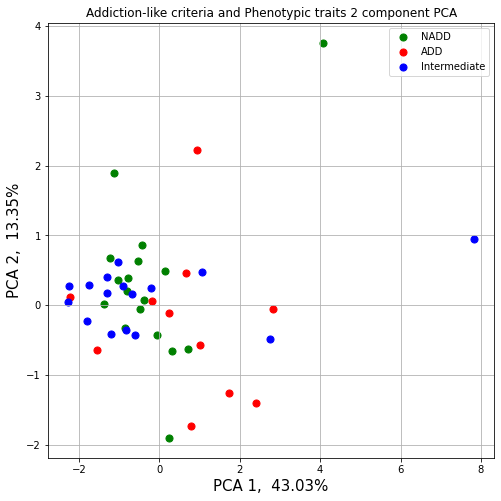

In [7]:
# plot
out_folder = '/Users/tatiana/Downloads'
plot_name = 'PCA'
varianceP1 = ''.join(str(float('{:.2f}'.format(pca.explained_variance_ratio_[0]*100))))
varianceP2 = ''.join(str(float('{:.2f}'.format(pca.explained_variance_ratio_[1]*100))))

# main plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PCA 1' + ',  ' + varianceP1 + '%', fontsize=15)
ax.set_ylabel('PCA 2' + ',  ' + varianceP2 + '%', fontsize=15)
ax.set_title('Addiction-like criteria and Phenotypic traits 2 component PCA', fontsize=12)


targets = ['NADD', 'ADD', 'Intermediate']
colors = ['g', 'r', 'b']


for target, color in zip(targets, colors):
    indicesToKeep = finalDF['Genotype'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PCA 1'],
               finalDF.loc[indicesToKeep, 'PCA 2'],
               c = color,
               s = 50)


    ax.legend(targets)
    ax.grid()

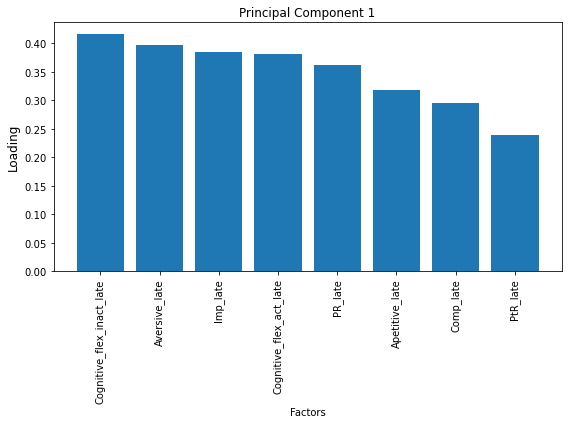

In [17]:

# Get the factor loadings for PC1 
loadings = pca.components_.T

# Sort the loadings in descending order for PC1
pc1_loadings = loadings[:, 0]
pc1_loadings_order = np.argsort(-pc1_loadings)  # Sort in descending order

# Create a bar plot for PC1 loadings
plt.figure(figsize=(8, 6))
plt.bar(range(len(features)), pc1_loadings[pc1_loadings_order])
plt.xticks(range(len(features)), np.array(features)[pc1_loadings_order], rotation=90)
plt.xlabel('Factors')
plt.ylabel('Loading', fontsize=12)
plt.title('Principal Component 1', fontsize=12)
plt.tight_layout()
plt.savefig('PCA_factors_1.pdf')

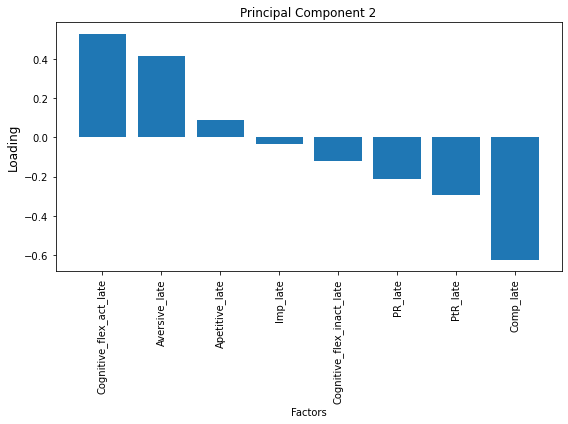

In [19]:
# Get the factor loadings PC2
loadings = pca.components_.T

# Sort the loadings in descending order for PC2
pc2_loadings = loadings[:, 1]
pc2_loadings_order = np.argsort(-pc2_loadings)  # Sort in descending order

# Create a bar plot for PC2 loadings
plt.figure(figsize=(8, 6))
plt.bar(range(len(features)), pc2_loadings[pc2_loadings_order])
plt.xticks(range(len(features)), np.array(features)[pc2_loadings_order], rotation=90)
plt.xlabel('Factors')
plt.ylabel('Loading', fontsize=12)
plt.title('Principal Component 2', fontsize=12)
plt.tight_layout()
plt.savefig('PCA_factors_2.pdf')

PCA by 'Set' type to eliminate the possibility of data clustering in connection with the person collecting the data. 

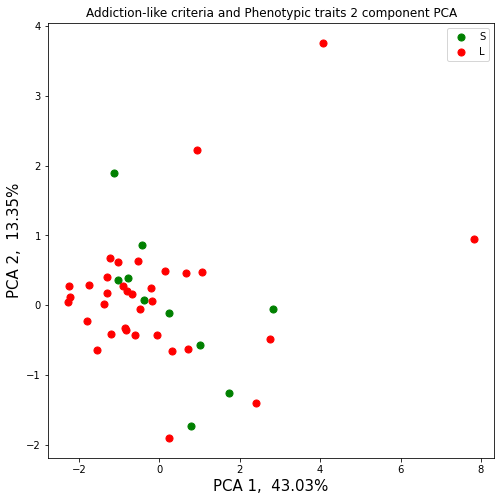

In [8]:
# plot
out_folder = '/Users/tatiana/Downloads'
plot_name = 'PCA_people'
varianceP1 = ''.join(str(float('{:.2f}'.format(pca.explained_variance_ratio_[0]*100))))
varianceP2 = ''.join(str(float('{:.2f}'.format(pca.explained_variance_ratio_[1]*100))))

# main plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PCA 1' + ',  ' + varianceP1 + '%', fontsize=15)
ax.set_ylabel('PCA 2' + ',  ' + varianceP2 + '%', fontsize=15)
ax.set_title('Addiction-like criteria and Phenotypic traits 2 component PCA', fontsize=12)


targets = ['S','L']
colors = ['g', 'r']


for target, color in zip(targets, colors):
    indicesToKeep = finalDF['Set'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PCA 1'],
               finalDF.loc[indicesToKeep, 'PCA 2'],
               c = color,
               s = 50)


    ax.legend(targets)
    ax.grid()

## Correlation matrix

Split the table for addictive and not addictive

In [101]:
df_add = df_redused[df_redused['Genotype'] == 'ADD'].drop(columns=['Mice', 'Set', 'Genotype'])
df_nadd = df_redused[df_redused['Genotype'] == 'NADD'].drop(columns=['Mice', 'Set', 'Genotype'])

Text(0.5, 1.0, 'Addictive group')

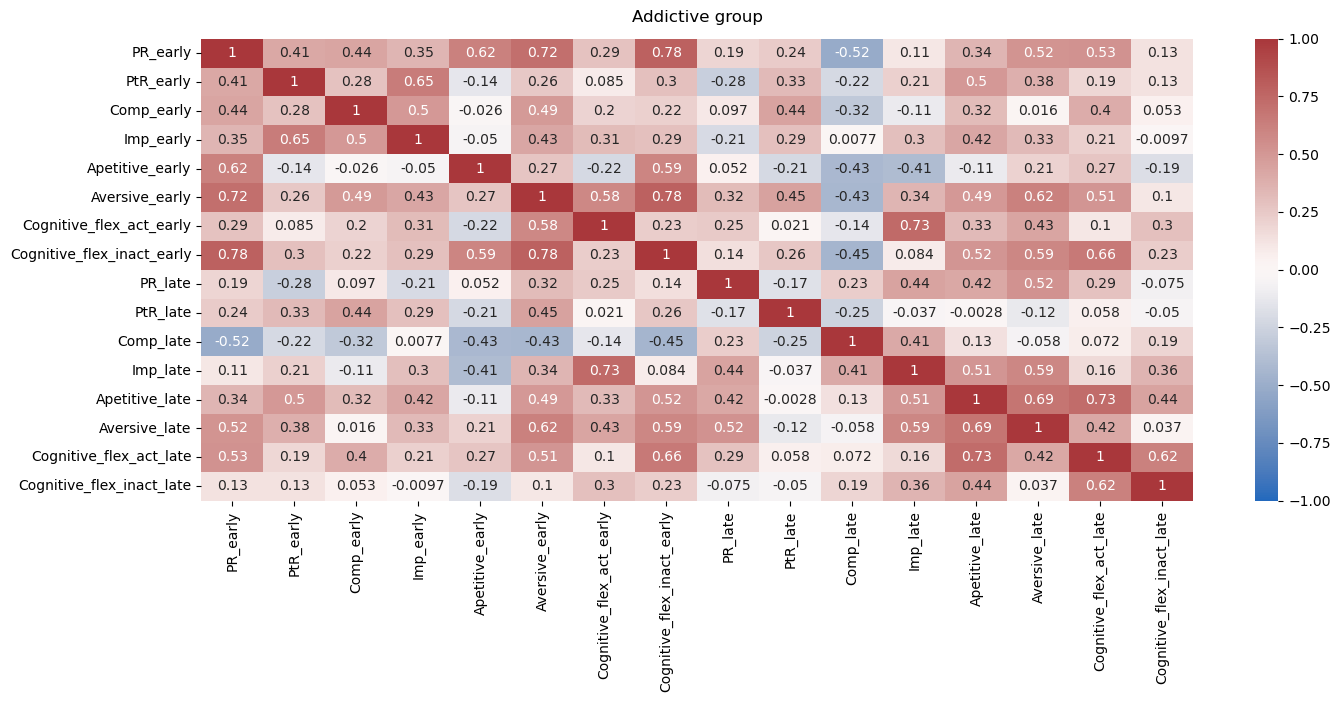

In [115]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_add.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Addictive group', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Not addictive group')

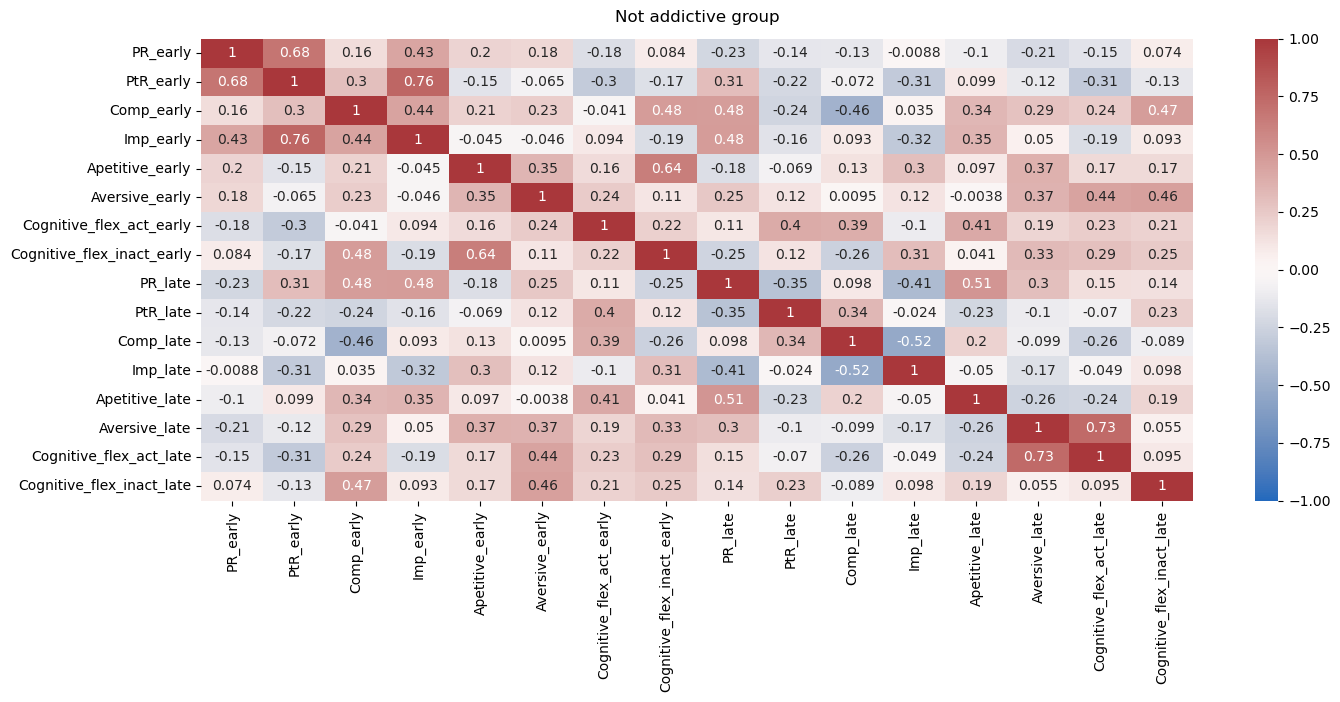

In [114]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_nadd.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Not addictive group', fontdict={'fontsize':12}, pad=12)